# Lab 3: Decision Trees


In [2]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Installing the Graphviz module used for visualizing the decision tree

## Question 1
Read the weather dataset, using read_csv. How many rows and columns are there?

In [3]:
weather_df = pd.read_csv('weather.nominal.csv')

In [4]:
weather_df.head(14)

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [5]:
weather_df.shape

(14, 5)

### Features and Target: X and y
We construct a dataframe, labeled X, consisting of all the columns except the target, 'play'. They we construct a series, y, consisting solely of the target column 'play'.

In [6]:
X = weather_df[['outlook', 'temperature', 'humidity', 'windy']]
y = weather_df['play']

### Dummy Values
The features in X can have multiple nominal values -- for example, 'temperature' can be 'hot', 'mild' or 'cool'. We convert the features into multiple binary-valued features, using get_dummies. 

In [7]:
X = pd.get_dummies(X)

## Question 2
How many rows and columns are there in X after applying get_dummies?

In [8]:
X.shape

(14, 9)

## Making a decision tree
We create a decision tree for the weather data, called dtree. We simply assign dtree to <b>DecisionTreeClassifier()</b>, which creates a decision tree instance. To train the model, use the <b>fit</b> method. Then you print accuracy.

In [9]:
dtree = DecisionTreeClassifier()
dtree.fit(X, y)
print("Accuracy on training set: {:.3f}".format(dtree.score(X, y)))


Accuracy on training set: 1.000


Next, you can display the tree using graphviz

In [10]:

dtree = DecisionTreeClassifier(max_depth=2,criterion='entropy')

dtree.fit(X, y)
print("Accuracy on training set: {:.3f}".format(dtree.score(X, y)))


Accuracy on training set: 0.857


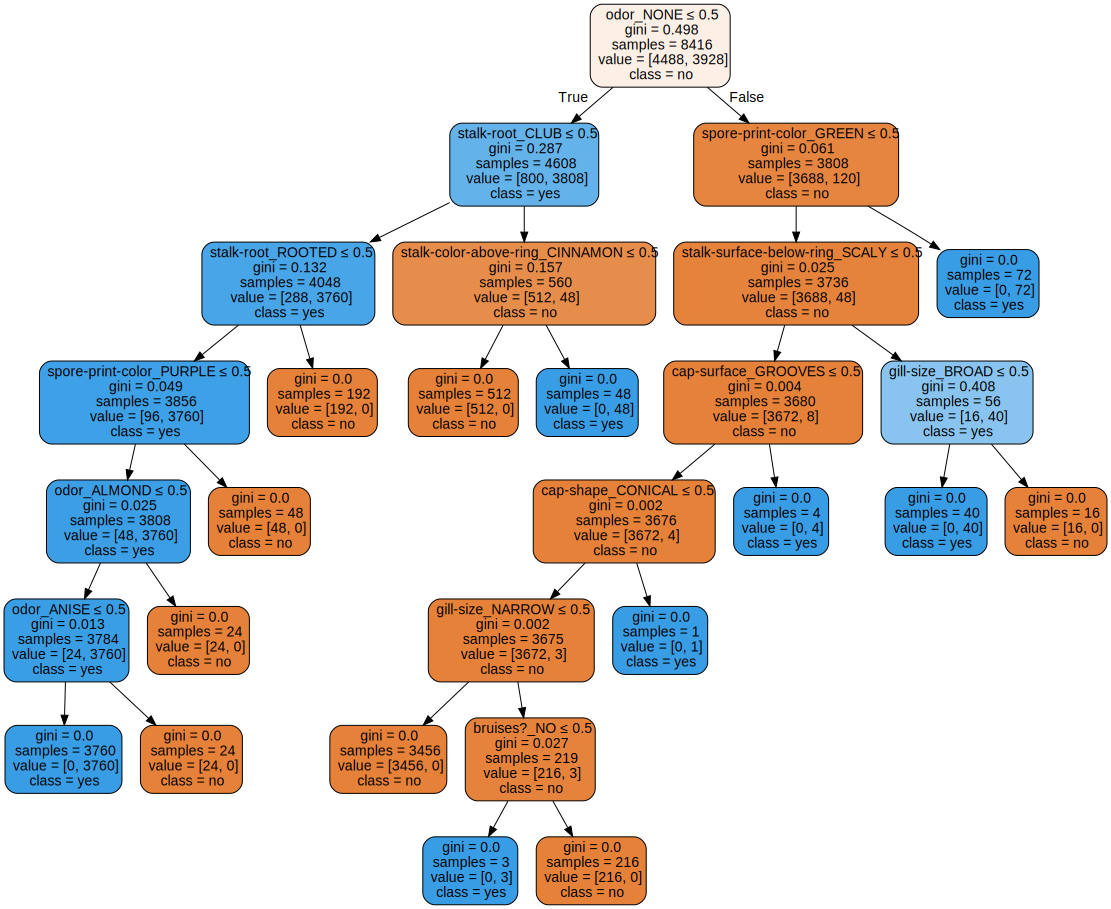

In [13]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dtree, out_file=None,
                                feature_names=X.columns,
                               class_names=['no','yes'],
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

## Question 4

Each path in a decision tree can be treated as a rule, of the form, <b>If A and B ... Then class=V</b>. Give the shortest path of the above tree, in a rule of this form.


If Not outlook_overcast is False Then class=yes

or more simply

If overcast then play


## Question 5
Read the mushroom dataset, using read_csv. How many rows and columns are there?

In [14]:
mushroom_df = pd.read_csv('mushroom.csv')

In [15]:
mushroom_df.shape

(8416, 23)

## Question 6
Create a dataframe X will all columns except the target, 'class'. You can either list all the columns, like you did for weather, or use the method
<a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html>drop</a>.
(Make sure to set axis=1, which specifies that is it a column not a row.) 

Next create a series, y, consisting of the single column, 'class'.

In [16]:
X = mushroom_df.drop(['class'], axis=1)
y = mushroom_df['class']

In [17]:
X.shape

(8416, 22)

In [18]:
y.shape

(8416,)

## Question 7
Now convert X and y into binary values, using get_dummies, like we did with weather.

In [19]:
X = pd.get_dummies(X)

In [20]:
y.shape

(8416,)

## Question 8
Create a decision tree for the mushroom data, using default values for the tree. Fit the tree to the X and y data, and print accuracy on the training data. Display the tree using graphviz.

In [21]:

dtree = DecisionTreeClassifier()
dtree.fit(X, y)
print("Accuracy on training set: {:.3f}".format(dtree.score(X, y)))

Accuracy on training set: 1.000


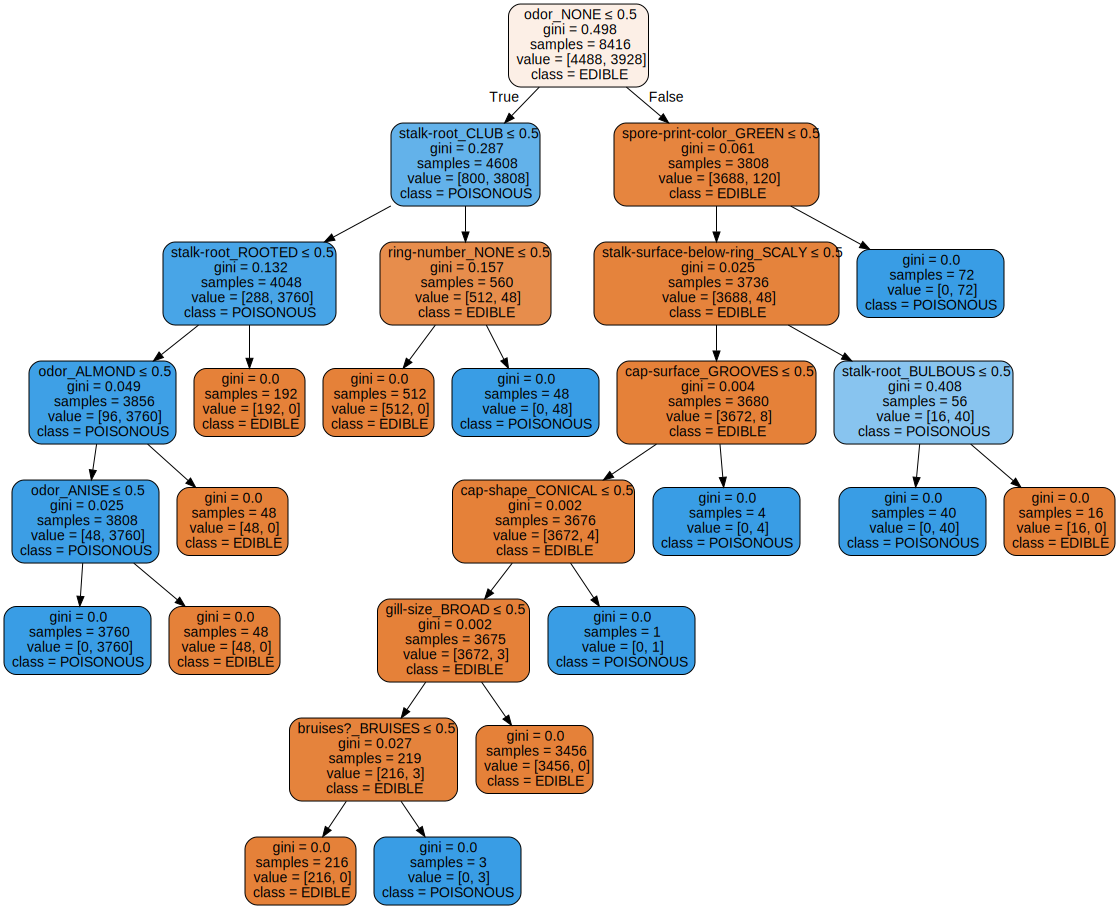

In [22]:
dot1_data = export_graphviz(dtree, out_file=None,
                                feature_names=X.columns,
                               class_names=['EDIBLE', 'POISONOUS'],
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot1_data)
graph

## Question 9
Create a decision tree with max_depth=2. Fit the tree and print accuracy. Display the tree.

In [22]:

dtree = DecisionTreeClassifier(max_depth=2)
dtree.fit(X, y)
print("Accuracy on training set: {:.3f}".format(dtree.score(X, y)))

Accuracy on training set: 0.954


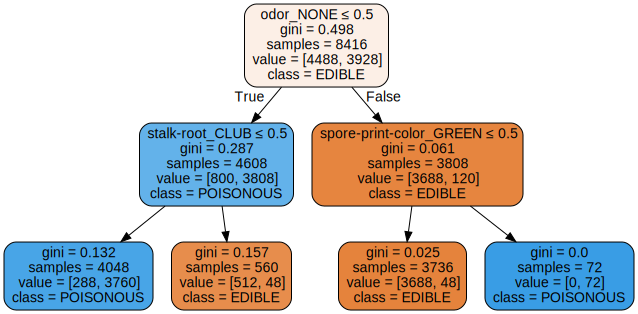

In [23]:
dot1_data = export_graphviz(dtree, out_file=None,
                                feature_names=X.columns,
                               class_names=['EDIBLE', 'POISONOUS'],
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot1_data)
graph

## Question 10
A standard baseline for a binary classifier, is simply to guess the most frequent class. What is the most frequent class for the mushroom data? What is the accuracy of a baseline classifier that always guesses the most frequent class?

In [24]:
y.value_counts()

EDIBLE       4488
POISONOUS    3928
Name: class, dtype: int64

Most frequent is edible. Baseline classifier accuracy is 0.5332

In [251]:
4488/(4488+3928)

0.5332699619771863